In [46]:
import pandas as pd

In [47]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [48]:
from sklearn.model_selection import train_test_split
y = df['Outcome']
X = df.drop(columns='Outcome')
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=31)

In [49]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(criterion='entropy',random_state=17)
RFC.fit(X_train,y_train)
y_pred = RFC.predict(X_test)
outcome = pd.DataFrame({'Actuls':y_test,'Predicted':y_pred})
outcome

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,Actuls,Predicted
55,0,0
87,0,0
752,0,0
202,0,0
378,1,1
160,0,0
639,0,0
646,1,0
591,0,0
119,0,0


In [50]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score,roc_auc_score,roc_curve
confusion_matrix = confusion_matrix(y_test,y_pred)
confusion_matrix

array([[78, 20],
       [26, 30]], dtype=int64)

In [51]:
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Precision:", precision_score(y_test,y_pred))
print("Recall:", recall_score(y_test,y_pred))
print("F-1Score:", f1_score(y_test,y_pred))

Accuracy: 0.7012987012987013
Precision: 0.6
Recall: 0.5357142857142857
F-1Score: 0.5660377358490566


In [52]:
y_pred_proba = RFC.predict_proba(X_test)[:,1]
y_pred_proba

array([0. , 0.2, 0.1, 0.4, 0.7, 0.4, 0.1, 0.5, 0.1, 0. , 0.2, 0.9, 0.4,
       0.5, 0.3, 0.4, 0.2, 0.1, 0.8, 0. , 0.7, 1. , 0.4, 0.1, 0.1, 0.4,
       0.7, 0.9, 0.4, 0.8, 0.6, 0.3, 0. , 0.5, 0.2, 0. , 0.1, 0.9, 0.2,
       0.2, 0.2, 0. , 0.5, 0.6, 0. , 0.7, 0.5, 0. , 0.4, 0.7, 0.8, 0.3,
       0.8, 0.6, 0.7, 0.1, 0.6, 0. , 0.4, 0.7, 0.1, 0.6, 0.1, 0.9, 0.4,
       0.5, 0.6, 0.2, 0.7, 0. , 0.5, 0.3, 0. , 0.6, 0.8, 0.6, 0.1, 0.8,
       0.4, 0.4, 0.4, 0.8, 0.4, 0.4, 0.3, 0.7, 0.7, 0.8, 0.9, 0.5, 0.7,
       0.5, 0.9, 0. , 0. , 0.3, 0.1, 0.9, 0.5, 0.2, 0.2, 0. , 0.5, 0.1,
       0.6, 0.6, 0.1, 0.7, 0. , 0.3, 0.1, 0.7, 0.3, 0.7, 0.2, 0.3, 0.7,
       0.4, 0.1, 0.2, 0. , 0. , 1. , 0.9, 0.4, 0.1, 0.5, 0.4, 0.8, 0.1,
       0.9, 0. , 0.4, 0.8, 0.6, 0.5, 0.6, 0.2, 0.6, 0.2, 0.3, 0.5, 0.3,
       0.3, 0. , 0.4, 0.1, 0.6, 0. , 0.5, 0.3, 0.1, 0.4, 0. ])

In [53]:
fpr,tpr,thresold = roc_curve(y_test,y_pred_proba)
auc = roc_auc_score(y_test,y_pred_proba)
print("FPR:",fpr)
print('\n')
print("TPR:",tpr)
print('\n')
print("Thresold:",thresold)
print('\n')
print("AUC:",auc)

FPR: [0.         0.         0.03061224 0.07142857 0.15306122 0.20408163
 0.28571429 0.42857143 0.5        0.59183673 0.78571429 1.        ]


TPR: [0.         0.03571429 0.14285714 0.25       0.375      0.53571429
 0.66071429 0.78571429 0.89285714 0.98214286 1.         1.        ]


Thresold: [2.  1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1 0. ]


AUC: 0.764121720116618


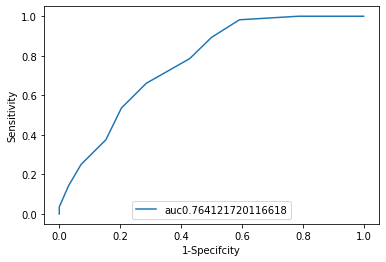

In [54]:
import matplotlib.pyplot as plt

plt.plot(fpr,tpr,label='auc'+str(auc))
plt.xlabel('1-Specifcity')
plt.ylabel('Sensitivity')
plt.legend(loc=8)
plt.show()

    Scores  NO.of Estimators
0    False                10
1    False                20
2    False                30
3    False                40
4    False                50
5    False                60
6    False                70
7    False                80
8    False                90
9    False               100
10   False               110
11   False               120
12   False               130
13   False               140
14   False               150
15   False               160
16   False               170
17   False               180
18   False               190


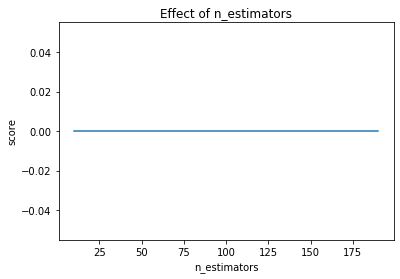

In [78]:
estimators = np.arange(10,200,10)
scores = []
for n in estimators:
    RFC.set_params(n_estimators=n)
    RFC.fit(X_train,y_train)
    scores.append(RFC.oob_score)
    
df_oob_scores = pd.DataFrame({'Scores':scores,'NO.of Estimators':estimators})
print(df_oob_scores)
plt.title("Effect of n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("score")
plt.plot(estimators,scores)

In [55]:
RFC.feature_importances_

array([0.0753507 , 0.23783753, 0.08516746, 0.0789454 , 0.06947858,
       0.19730831, 0.12917753, 0.12673449])

## Hyperparameter tuning

In [56]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
param_dict = {
    'n_estimators': np.arange(10,100,10),
    'max_depth': np.arange(2,10,2),
    'min_samples_leaf': np.arange(5,20,2),
    'min_samples_split': np.arange(5,20,2)
}
RRFC = RandomizedSearchCV(RFC,param_distributions=param_dict,n_iter=2000,cv=5)
RRFC.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='entropy',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=10,
                                                    n_jobs=None,

In [58]:
RRFC.best_params_

{'n_estimators': 20,
 'min_samples_split': 19,
 'min_samples_leaf': 7,
 'max_depth': 6}

In [59]:
y_pred = RRFC.predict(X_test)
outcome = pd.DataFrame({'Actuals':y_test,'Predicted':y_pred})
outcome

,Actuals,Predicted
55,0,0
87,0,0
752,0,0
202,0,0
378,1,1
160,0,1
639,0,0
646,1,0
591,0,0
119,0,0


In [60]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score,roc_auc_score,roc_curve
confusion_matrix = confusion_matrix(y_test,y_pred)
confusion_matrix

array([[76, 22],
       [25, 31]], dtype=int64)

In [61]:
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Precision:", precision_score(y_test,y_pred))
print("Recall:", recall_score(y_test,y_pred))
print("F-1Score:", f1_score(y_test,y_pred))

Accuracy: 0.6948051948051948
Precision: 0.5849056603773585
Recall: 0.5535714285714286
F-1Score: 0.5688073394495413


In [62]:
y_pred_proba = RFC.predict_proba(X_test)[:,1]
y_pred_proba

array([0. , 0.2, 0.1, 0.4, 0.7, 0.4, 0.1, 0.5, 0.1, 0. , 0.2, 0.9, 0.4,
       0.5, 0.3, 0.4, 0.2, 0.1, 0.8, 0. , 0.7, 1. , 0.4, 0.1, 0.1, 0.4,
       0.7, 0.9, 0.4, 0.8, 0.6, 0.3, 0. , 0.5, 0.2, 0. , 0.1, 0.9, 0.2,
       0.2, 0.2, 0. , 0.5, 0.6, 0. , 0.7, 0.5, 0. , 0.4, 0.7, 0.8, 0.3,
       0.8, 0.6, 0.7, 0.1, 0.6, 0. , 0.4, 0.7, 0.1, 0.6, 0.1, 0.9, 0.4,
       0.5, 0.6, 0.2, 0.7, 0. , 0.5, 0.3, 0. , 0.6, 0.8, 0.6, 0.1, 0.8,
       0.4, 0.4, 0.4, 0.8, 0.4, 0.4, 0.3, 0.7, 0.7, 0.8, 0.9, 0.5, 0.7,
       0.5, 0.9, 0. , 0. , 0.3, 0.1, 0.9, 0.5, 0.2, 0.2, 0. , 0.5, 0.1,
       0.6, 0.6, 0.1, 0.7, 0. , 0.3, 0.1, 0.7, 0.3, 0.7, 0.2, 0.3, 0.7,
       0.4, 0.1, 0.2, 0. , 0. , 1. , 0.9, 0.4, 0.1, 0.5, 0.4, 0.8, 0.1,
       0.9, 0. , 0.4, 0.8, 0.6, 0.5, 0.6, 0.2, 0.6, 0.2, 0.3, 0.5, 0.3,
       0.3, 0. , 0.4, 0.1, 0.6, 0. , 0.5, 0.3, 0.1, 0.4, 0. ])

In [63]:
from sklearn.model_selection import GridSearchCV
param_dict = {
    'n_estimators': np.arange(18,22),
    'max_depth': np.arange(3,8),
    'min_samples_leaf': np.arange(5,9),
    'min_samples_split': np.arange(17,21)
}
GRFC = GridSearchCV(RFC,param_grid=param_dict,cv=5)
GRFC.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=17,
                                              verbose=0, warm_start=False),
             iid='w

In [64]:
GRFC.best_params_

{'max_depth': 6,
 'min_samples_leaf': 7,
 'min_samples_split': 20,
 'n_estimators': 20}

In [67]:
y_pred = RRFC.predict(X_test)
outcome = pd.DataFrame({'Actuals':y_test,'Predicted':y_pred})
outcome

,Actuals,Predicted
55,0,0
87,0,0
752,0,0
202,0,0
378,1,1
160,0,1
639,0,0
646,1,0
591,0,0
119,0,0


In [68]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score,roc_auc_score,roc_curve
confusion_matrix = confusion_matrix(y_test,y_pred)
confusion_matrix

array([[76, 22],
       [25, 31]], dtype=int64)

In [69]:
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Precision:", precision_score(y_test,y_pred))
print("Recall:", recall_score(y_test,y_pred))
print("F-1Score:", f1_score(y_test,y_pred))

Accuracy: 0.6948051948051948
Precision: 0.5849056603773585
Recall: 0.5535714285714286
F-1Score: 0.5688073394495413
